<a href="https://colab.research.google.com/github/faisu6339-glitch/ML-Projects-/blob/main/P13_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('customer_churn_1M.csv')

In [ ]:
df.head()

,customer_id,signup_date,age,gender,annual_income,education,marital_status,dependents,tenure,contract,...,has_streaming_tv,has_streaming_movies,customer_satisfaction,num_complaints,num_service_calls,late_payments,avg_monthly_gb,days_since_last_interaction,credit_score,churn
0,CUST0000000001,2022-12-12 12:53:58.199463,43,Female,55085.25,college,married,1,2,two_year,...,1,1,9.0,0.0,0,0,109.63,16,NaN,0
1,CUST0000000002,2022-01-13 12:53:58.199973,18,Male,60786.11,master,married,1,22,one_year,...,0,1,7.0,0.0,3,1,63.25,134,585.0,0
2,CUST0000000003,2023-09-04 12:53:58.199985,38,Female,73184.32,high_school,widowed,0,3,two_year,...,1,0,6.0,1.0,1,0,47.77,11,632.0,0
3,CUST0000000004,2022-06-27 12:53:58.199992,44,Male,40923.78,high_school,married,1,6,two_year,...,0,1,5.0,2.0,2,1,50.82,6,569.0,0
4,CUST0000000005,2022-12-08 12:53:58.199999,45,Female,36400.94,bachelor,single,0,9,two_year,...,0,1,8.0,1.0,1,0,16.74,18,657.0,0


In [ ]:
df.columns

Index(['customer_id', 'signup_date', 'age', 'gender', 'annual_income',
       'education', 'marital_status', 'dependents', 'tenure', 'contract',
       'payment_method', 'paperless_billing', 'senior_citizen',
       'monthlycharges', 'totalcharges', 'num_services', 'has_phone_service',
       'has_internet_service', 'has_online_security', 'has_online_backup',
       'has_device_protection', 'has_tech_support', 'has_streaming_tv',
       'has_streaming_movies', 'customer_satisfaction', 'num_complaints',
       'num_service_calls', 'late_payments', 'avg_monthly_gb',
       'days_since_last_interaction', 'credit_score', 'churn'],
      dtype='object')

In [ ]:
df.describe()

,age,annual_income,dependents,tenure,senior_citizen,monthlycharges,totalcharges,num_services,has_phone_service,has_internet_service,...,has_streaming_tv,has_streaming_movies,customer_satisfaction,num_complaints,num_service_calls,late_payments,avg_monthly_gb,days_since_last_interaction,credit_score,churn
count,1000000.000000,970041.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.00000,1000000.000000,980079.000000,970094.000000,1000000.000000,1000000.000000,949988.000000,1000000.000000,959605.000000,1000000.000000
mean,44.724603,58788.311936,0.799831,22.381923,0.199511,86.443701,1837.321438,2.563721,0.769551,0.849742,...,0.59999,0.549086,6.159110,0.701667,1.760248,0.400969,39.095179,44.494191,678.562134,0.099227
std,14.479468,37137.433079,0.893654,20.073341,0.399633,27.592430,1803.721634,1.412330,0.421120,0.357324,...,0.48990,0.497585,2.328287,0.838148,1.485677,0.633289,43.852564,44.922587,87.642951,0.298967
min,18.000000,20000.000000,0.000000,1.000000,0.000000,20.000000,16.300000,1.000000,0.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000
25%,34.000000,32712.560000,0.000000,6.000000,0.000000,70.490000,484.530000,1.000000,1.000000,1.000000,...,0.00000,0.000000,4.000000,0.000000,1.000000,0.000000,12.840000,12.000000,619.000000,0.000000
50%,44.000000,48954.600000,1.000000,16.000000,0.000000,85.480000,1249.750000,2.000000,1.000000,1.000000,...,1.00000,1.000000,7.000000,1.000000,1.000000,0.000000,27.770000,31.000000,680.000000,0.000000
75%,55.000000,73475.130000,1.000000,33.000000,0.000000,100.680000,2617.660000,3.000000,1.000000,1.000000,...,1.00000,1.000000,8.000000,1.000000,3.000000,1.000000,51.230000,62.000000,740.000000,0.000000
max,90.000000,250000.000000,5.000000,72.000000,1.000000,854.956730,16252.861508,6.000000,1.000000,1.000000,...,1.00000,1.000000,9.000000,7.000000,12.000000,5.000000,557.824023,365.000000,850.000000,1.000000


In [ ]:
df.isnull().sum()

,0
customer_id,0
signup_date,0
age,0
gender,0
annual_income,29959
education,0
marital_status,0
dependents,0
tenure,0
contract,0


In [ ]:
df.isnull().mean()

,0
customer_id,0.000000
signup_date,0.000000
age,0.000000
gender,0.000000
annual_income,0.029959
education,0.000000
marital_status,0.000000
dependents,0.000000
tenure,0.000000
contract,0.000000


In [ ]:
df.isnull().mean()*100

,0
customer_id,0.0000
signup_date,0.0000
age,0.0000
gender,0.0000
annual_income,2.9959
education,0.0000
marital_status,0.0000
dependents,0.0000
tenure,0.0000
contract,0.0000


In [ ]:
(df.isnull().mean() * 100).sort_values(ascending=False)

,0
avg_monthly_gb,5.0012
credit_score,4.0395
annual_income,2.9959
num_complaints,2.9906
customer_satisfaction,1.9921
customer_id,0.0000
age,0.0000
signup_date,0.0000
tenure,0.0000
contract,0.0000


#Numerical Columns (Impute with Median)

In [ ]:
num_cols = [
    'avg_monthly_gb',
    'credit_score',
    'annual_income',
    'num_complaints',
    'customer_satisfaction'
]

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-295/2584054542.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
print(num_cols)

['avg_monthly_gb', 'credit_score', 'annual_income', 'num_complaints', 'customer_satisfaction']


In [ ]:
df.isnull().sum()

,0
customer_id,0
signup_date,0
age,0
gender,0
annual_income,0
education,0
marital_status,0
dependents,0
tenure,0
contract,0


#Categorical Columns (Very Low Missing)

In [ ]:
cat_cols = [
    'gender','contract','payment_method','marital_status',
    'education','paperless_billing'
]

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-295/1048168071.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df['signup_date']

,signup_date
0,2022-12-12 12:53:58.199463
1,2022-01-13 12:53:58.199973
2,2023-09-04 12:53:58.199985
3,2022-06-27 12:53:58.199992
4,2022-12-08 12:53:58.199999
...,...
999995,2025-02-03 12:54:09.482412
999996,2024-09-08 12:54:09.482417
999997,2021-09-13 12:54:09.482423
999998,2025-08-30 12:54:09.482428


In [ ]:
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')

In [ ]:
# Drop rows where signup_date could not be parsed
df.dropna(subset=['signup_date'], inplace=True)

df.isnull().sum()

,0
customer_id,0
signup_date,0
age,0
gender,0
annual_income,0
education,0
marital_status,0
dependents,0
tenure,0
contract,0


In [ ]:
df['signup_year'] = df['signup_date'].dt.year
df['signup_month'] = df['signup_date'].dt.month

In [ ]:
print(df['signup_year'].head())

0    2022
1    2022
2    2023
3    2022
4    2022
Name: signup_year, dtype: int32


In [ ]:
print(df['signup_month'].head())

0    12
1     1
2     9
3     6
4    12
Name: signup_month, dtype: int32


#Binary Columns (Yes/No)

In [ ]:
binary_cols = [
    'senior_citizen','has_phone_service','has_internet_service',
    'has_online_security','has_online_backup','has_streaming_movies'
]

for col in binary_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-295/920422849.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-295/920422849.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
df.isnull().sum()

,0
customer_id,0
signup_date,0
age,0
gender,0
annual_income,0
education,0
marital_status,0
dependents,0
tenure,0
contract,0


#Feature Engineering

Total customer value

In [ ]:
df['avg_charge_per_month'] = df['totalcharges'] / (df['tenure'] + 1)

In [ ]:
df['avg_charge_per_month'].head()

,avg_charge_per_month
0,48.130000
1,69.661739
2,82.202500
3,91.921429
4,64.879000


Service intensity

In [ ]:
df['usage_intensity'] = df['avg_monthly_gb'] / (df['num_services'] + 1)

In [ ]:
df['usage_intensity'].head()

,usage_intensity
0,54.815000
1,21.083333
2,9.554000
3,12.705000
4,4.185000


Complaint flag

In [ ]:
df['has_complaint'] = df['num_complaints'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df['has_complaint'].head()

,has_complaint
0,0
1,0
2,1
3,1
4,1


#1. Income & Spending Features

Monthly Income

In [ ]:
df['monthly_income'] = df['annual_income'] / 12

In [ ]:
df['monthly_income'].head()

,monthly_income
0,4590.437500
1,5065.509167
2,6098.693333
3,3410.315000
4,3033.411667


Charges to Income Ratio

In [ ]:
df['spend_ratio'] = df['monthlycharges'] / (df['monthly_income'] + 1)

In [ ]:
df['spend_ratio'].head()

,spend_ratio
0,0.014636
1,0.014120
2,0.018394
3,0.031510
4,0.036267


Total Charges per Month

In [ ]:
df['avg_charge_per_month'] = df['totalcharges'] / (df['tenure'] + 1)

In [ ]:
df['avg_charge_per_month']

,avg_charge_per_month
0,48.130000
1,69.661739
2,82.202500
3,91.921429
4,64.879000
...,...
999995,70.663333
999996,63.624167
999997,101.756154
999998,52.803200


#2. Date-Based Features (from signup_date)

Customer Age (tenure from signup)

In [ ]:
df['customer_age_days'] = (pd.Timestamp.today() - df['signup_date']).dt.days

In [ ]:
# Impute remaining columns with a single missing value using mode
cols_with_one_nan = [
    'monthlycharges', 'totalcharges', 'num_services', 'has_device_protection',
    'has_tech_support', 'has_streaming_tv', 'num_service_calls',
    'late_payments', 'days_since_last_interaction', 'churn',
    'avg_charge_per_month', 'usage_intensity', 'spend_ratio'
]

for col in cols_with_one_nan:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-295/2420495071.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-295/2420495071.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
# Verify no more missing values
df.isnull().sum().sum()


np.int64(0)

In [ ]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = df[col].astype('category').cat.codes
    df[col] = df[col].astype('int8')

In [ ]:
df['customer_age_days'].head()

,customer_age_days
0,1173
1,1506
2,907
3,1341
4,1177


Signup Year

In [ ]:
df['signup_year'] = df['signup_date'].dt.year

In [ ]:
df['signup_year']

,signup_year
0,2022
1,2022
2,2023
3,2022
4,2022
...,...
999995,2025
999996,2024
999997,2021
999998,2025


Signup Month

In [ ]:
df['signup_month'] = df['signup_date'].dt.month

In [ ]:
df['signup_month']

,signup_month
0,12
1,1
2,9
3,6
4,12
...,...
999995,2
999996,9
999997,9
999998,8


In [ ]:
df['is_new_customer'] = df['tenure'].apply(lambda x: 1 if x < 6 else 0)

In [ ]:
df['is_new_customer'].head()

,is_new_customer
0,1
1,0
2,1
3,0
4,0


#3. Complaint & Satisfaction Features

Complaint Flag

In [ ]:
df['has_complaint'] = (df['num_complaints'] > 0).astype(int)

In [ ]:
df['has_complaint']

,has_complaint
0,0
1,0
2,1
3,1
4,1
...,...
999995,1
999996,0
999997,0
999998,0


Complaints per Month

In [ ]:
df['complaints_per_month'] = df['num_complaints'] / (df['tenure'] + 1)

In [ ]:
df['complaints_per_month'].head()

,complaints_per_month
0,0.000000
1,0.000000
2,0.250000
3,0.285714
4,0.100000


Low Satisfaction Flag

In [ ]:
df['low_satisfaction'] = (df['customer_satisfaction'] <= 2).astype(int)

In [ ]:
df['low_satisfaction'].head()

,low_satisfaction
0,0
1,0
2,0
3,0
4,0


#Outliers Detection

In [ ]:
outlier_counts = {}

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts[col] = len(outliers)

# Show results sorted
outlier_counts = pd.Series(outlier_counts).sort_values(ascending=False)
print(outlier_counts)

is_new_customer                220655
complaints_per_month           125888
low_satisfaction                88532
usage_intensity                 71471
avg_monthly_gb                  63899
annual_income                   48960
monthly_income                  48960
dependents                      47406
days_since_last_interaction     47040
totalcharges                    45654
num_complaints                  33220
spend_ratio                     32117
monthlycharges                   9740
late_payments                    7914
num_service_calls                7809
avg_charge_per_month             6601
credit_score                     5104
age                              2555
tenure                              0
senior_citizen                      0
num_services                        0
customer_satisfaction               0
has_complaint                       0
customer_age_days                   0
dtype: int64


In [ ]:
outlier_rows = pd.DataFrame()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    temp = df[(df[col] < lower) | (df[col] > upper)]
    outlier_rows = pd.concat([outlier_rows, temp])

outlier_rows = outlier_rows.drop_duplicates()

print("Total rows with outliers:", outlier_rows.shape[0])

Total rows with outliers: 530984


In [ ]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(4,2))
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

#Best Treatment Method → Capping (Winsorization)

In [ ]:
num_cols_to_cap = [
    'avg_monthly_gb','annual_income','monthly_income','totalcharges',
    'monthlycharges','spend_ratio','usage_intensity',
    'avg_charge_per_month','credit_score','age',
    'days_since_last_interaction','complaints_per_month'
]

for col in num_cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

#Check Outliers Again (After Treatment)

In [ ]:
outlier_counts_after = {}

# Numerical columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts_after[col] = len(outliers)

# Show sorted result
outlier_counts_after = pd.Series(outlier_counts_after).sort_values(ascending=False)
print(outlier_counts_after)

is_new_customer                220655
low_satisfaction                88532
dependents                      47406
num_complaints                  33220
late_payments                    7914
num_service_calls                7809
annual_income                       0
age                                 0
num_services                        0
totalcharges                        0
monthlycharges                      0
senior_citizen                      0
tenure                              0
days_since_last_interaction         0
avg_monthly_gb                      0
customer_satisfaction               0
avg_charge_per_month                0
credit_score                        0
usage_intensity                     0
has_complaint                       0
spend_ratio                         0
monthly_income                      0
customer_age_days                   0
complaints_per_month                0
dtype: int64


#Exclude Binary/Categorical Columns

We should check outliers only for continuous numerical features.

Correct Outlier Check

In [ ]:
outlier_counts_after = {}

# Select only continuous numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove binary columns (only 0/1 values)
num_cols = [col for col in num_cols if df[col].nunique() > 10]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts_after[col] = len(outliers)

outlier_counts_after = pd.Series(outlier_counts_after).sort_values(ascending=False)
print(outlier_counts_after)

num_service_calls              7809
annual_income                     0
age                               0
tenure                            0
monthlycharges                    0
totalcharges                      0
avg_monthly_gb                    0
days_since_last_interaction       0
credit_score                      0
avg_charge_per_month              0
usage_intensity                   0
monthly_income                    0
spend_ratio                       0
customer_age_days                 0
complaints_per_month              0
dtype: int64


In [ ]:
df.isnull().sum().sum()

np.int64(1000000)

In [ ]:
df.drop(['customer_id', 'signup_date'], axis=1, inplace=True, errors='ignore')

#Encode Categorical Variables
Identify categorical columns

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index([], dtype='object')


In [ ]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df.columns

Index(['age', 'annual_income', 'dependents', 'tenure', 'senior_citizen',
       'monthlycharges', 'totalcharges', 'num_services', 'has_phone_service',
       'has_internet_service', 'has_online_security', 'has_online_backup',
       'has_device_protection', 'has_tech_support', 'has_streaming_tv',
       'has_streaming_movies', 'customer_satisfaction', 'num_complaints',
       'num_service_calls', 'late_payments', 'avg_monthly_gb',
       'days_since_last_interaction', 'credit_score', 'churn', 'signup_year',
       'signup_month', 'avg_charge_per_month', 'usage_intensity',
       'has_complaint', 'monthly_income', 'spend_ratio', 'customer_age_days',
       'gender_Male', 'gender_Other', 'contract_one_year', 'contract_two_year',
       'payment_method_credit_card', 'payment_method_electronic_check',
       'payment_method_mailed_check', 'marital_status_married',
       'marital_status_single', 'marital_status_widowed', 'education_college',
       'education_high_school', 'education_maste

In [ ]:
df.shape

(1000000, 49)

In [ ]:
print(num_cols)

['age', 'annual_income', 'tenure', 'monthlycharges', 'totalcharges', 'num_service_calls', 'avg_monthly_gb', 'days_since_last_interaction', 'credit_score', 'avg_charge_per_month', 'usage_intensity', 'monthly_income', 'spend_ratio', 'customer_age_days', 'complaints_per_month']


In [ ]:
len(num_cols)

15

In [ ]:
df[num_cols].shape

(1000000, 15)

In [ ]:
print(cat_cols)

Index([], dtype='object')


In [ ]:
len(cat_cols)

0

In [ ]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = df[col].astype('int8')

In [ ]:
print(binary_cols)

['has_phone_service', 'has_internet_service', 'has_online_security', 'has_online_backup', 'has_device_protection', 'has_tech_support', 'has_streaming_tv', 'has_streaming_movies', 'churn', 'has_complaint', 'gender_Male', 'gender_Other', 'contract_one_year', 'contract_two_year', 'payment_method_credit_card', 'payment_method_electronic_check', 'payment_method_mailed_check', 'marital_status_married', 'marital_status_single', 'marital_status_widowed', 'education_college', 'education_high_school', 'education_master', 'education_phd', 'paperless_billing_Yes', 'is_new_customer', 'low_satisfaction']


In [ ]:
len(binary_cols)

27

#Univariate Analysis

In [ ]:
df.columns

Index(['age', 'annual_income', 'dependents', 'tenure', 'senior_citizen',
       'monthlycharges', 'totalcharges', 'num_services', 'has_phone_service',
       'has_internet_service', 'has_online_security', 'has_online_backup',
       'has_device_protection', 'has_tech_support', 'has_streaming_tv',
       'has_streaming_movies', 'customer_satisfaction', 'num_complaints',
       'num_service_calls', 'late_payments', 'avg_monthly_gb',
       'days_since_last_interaction', 'credit_score', 'churn', 'signup_year',
       'signup_month', 'avg_charge_per_month', 'usage_intensity',
       'has_complaint', 'monthly_income', 'spend_ratio', 'customer_age_days',
       'gender_Male', 'gender_Other', 'contract_one_year', 'contract_two_year',
       'payment_method_credit_card', 'payment_method_electronic_check',
       'payment_method_mailed_check', 'marital_status_married',
       'marital_status_single', 'marital_status_widowed', 'education_college',
       'education_high_school', 'education_maste

In [ ]:
df[num_cols]

,age,annual_income,tenure,monthlycharges,totalcharges,num_service_calls,avg_monthly_gb,days_since_last_interaction,credit_score,avg_charge_per_month,usage_intensity,monthly_income,spend_ratio,customer_age_days,complaints_per_month
0,43.0,55085.2500,2,67.20,144.39,0,103.12,16,680.0,48.130000,33.712500,4590.437500,0.014636,1173,0.000000
1,18.0,60786.1100,22,71.54,1602.22,3,63.25,134,585.0,69.661739,21.083333,5065.509167,0.014120,1506,0.000000
2,38.0,73184.3200,3,112.20,328.81,1,47.77,11,632.0,82.202500,9.554000,6098.693333,0.018394,907,0.192308
3,44.0,40923.7800,6,107.49,643.45,2,50.82,6,569.0,91.921429,12.705000,3410.315000,0.031510,1341,0.192308
4,45.0,36400.9400,9,110.05,648.79,1,16.74,18,657.0,64.879000,4.185000,3033.411667,0.036267,1177,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,25.0,21309.7800,5,90.70,423.98,2,7.12,14,688.0,70.663333,1.424000,1775.815000,0.051046,389,0.166667
999996,22.0,131272.9025,11,68.48,763.49,3,0.00,1,653.0,63.624167,0.000000,10939.408542,0.005003,537,0.000000
999997,44.0,34258.2700,12,101.98,1322.83,0,22.43,137,669.0,101.756154,5.607500,2854.855833,0.035709,1628,0.000000
999998,65.0,38687.9300,24,60.36,1320.08,0,0.00,17,843.0,52.803200,0.000000,3223.994167,0.018716,181,0.000000


In [ ]:
print(num_cols)

['age', 'annual_income', 'tenure', 'monthlycharges', 'totalcharges', 'num_service_calls', 'avg_monthly_gb', 'days_since_last_interaction', 'credit_score', 'avg_charge_per_month', 'usage_intensity', 'monthly_income', 'spend_ratio', 'customer_age_days', 'complaints_per_month']


In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000000.0,44.718289,14.460569,18.000000,34.000000,44.000000,55.000000,86.500000
annual_income,1000000.0,56597.706761,30485.095463,20000.000000,33185.465000,48954.600000,72420.440000,131272.902500
tenure,1000000.0,22.381923,20.073341,1.000000,6.000000,16.000000,33.000000,72.000000
monthlycharges,1000000.0,85.971792,22.737845,25.205000,70.490000,85.480000,100.680000,145.965000
totalcharges,1000000.0,1779.303889,1630.627734,16.300000,484.530000,1249.750000,2617.660000,5817.355000
num_service_calls,1000000.0,1.760248,1.485677,0.000000,1.000000,1.000000,3.000000,12.000000
avg_monthly_gb,1000000.0,34.923399,29.370733,0.000000,13.620000,27.770000,49.420000,103.120000
days_since_last_interaction,1000000.0,42.375891,37.920157,1.000000,12.000000,31.000000,62.000000,137.000000
credit_score,1000000.0,678.767401,85.415619,449.500000,622.000000,680.000000,737.000000,850.000000
avg_charge_per_month,1000000.0,72.549597,24.362956,8.150000,54.610000,71.580000,88.790045,140.060112


In [ ]:
df['age'].value_counts()

,count
age,
18.0,41393
45.0,26711
44.0,26603
43.0,26449
47.0,26392
...,...
82.0,1200
83.0,1012
84.0,805


In [ ]:
df['tenure'].value_counts()

,count
tenure,
1,79625
72,49810
2,37605
3,36037
4,34128
...,...
67,2465
68,2401
69,2299


In [ ]:
df['churn'].value_counts()
df['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,90.0773
1,9.9227


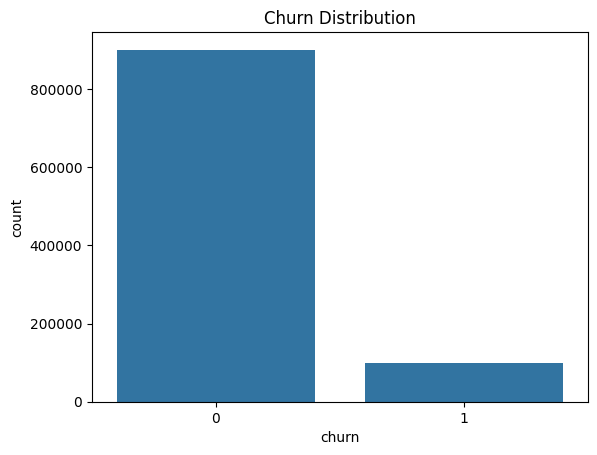

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [ ]:
df['age_group'] = pd.cut(df['age'],
                         bins=[18,30,45,60,100],
                         labels=['Young','Adult','Middle','Senior'])

In [ ]:
df['age_group']

,age_group
0,Adult
1,NaN
2,Adult
3,Adult
4,Adult
...,...
999995,Young
999996,Young
999997,Adult
999998,Senior


In [ ]:
import numpy as np
df['annual_income'] = np.log1p(df['annual_income'])

In [ ]:
df['annual_income']

,annual_income
0,10.916655
1,11.015133
2,11.200750
3,10.619491
4,10.502377
...,...
999995,9.966968
999996,11.785041
999997,10.441712
999998,10.563309


In [ ]:
df['is_new_customer'] = (df['tenure'] < 6).astype(int)

In [ ]:
df['is_new_customer']

,is_new_customer
0,1
1,0
2,1
3,0
4,0
...,...
999995,1
999996,0
999997,0
999998,0


In [ ]:
df['totalcharges'] = np.log1p(df['totalcharges'])

In [ ]:
df['totalcharges']

,totalcharges
0,4.979420
1,7.379769
2,5.798517
3,6.468397
4,6.476649
...,...
999995,6.052042
999996,6.639209
999997,7.188284
999998,7.186205


In [ ]:
df['avg_monthly_gb'] = np.log1p(df['avg_monthly_gb'])

In [ ]:
df['avg_monthly_gb']

,avg_monthly_gb
0,4.645544
1,4.162782
2,3.887115
3,3.947776
4,2.875822
...,...
999995,2.094330
999996,0.000000
999997,3.154017
999998,0.000000


In [ ]:
df['low_credit'] = (df['credit_score'] < 600).astype(int)

In [ ]:
df['low_credit']

,low_credit
0,0
1,1
2,0
3,1
4,0
...,...
999995,0
999996,0
999997,0
999998,0


In [ ]:
df['monthly_income'] = np.log1p(df['monthly_income'])

In [ ]:
df['monthly_income']

,monthly_income
0,8.431948
1,8.530407
2,8.715994
3,8.134853
4,8.017773
...,...
999995,7.482578
999996,9.300218
999997,7.957127
999998,8.078686


In [ ]:
df['usage_intensity'] = np.log1p(df['usage_intensity'])

In [ ]:
df['usage_intensity']

,usage_intensity
0,3.547100
1,3.094823
2,2.356505
3,2.617761
4,1.645770
...,...
999995,0.885419
999996,0.000000
999997,1.888205
999998,0.000000


In [ ]:
log_cols = [
    'annual_income',
    'totalcharges',
    'avg_monthly_gb',
    'usage_intensity',
    'monthly_income'
]

for col in log_cols:
    df[col] = np.log1p(df[col])

In [ ]:
print(log_cols)

['annual_income', 'totalcharges', 'avg_monthly_gb', 'usage_intensity', 'monthly_income']
